# **Internship on Data Science and Analytics| Project 2**

# **Customer Segmentation for Marketing Strategy**

**Objective: Aim to predict with precision whether bank customers will subscribe to term deposits after the marketing campaigns**

**Problem: To help the bank to predict accurately whether the customer will subscribe to the focus product for the campaign - Term Deposit after the campaign?**

***Week 1: Data Collection, Preprocessing and EDA***

In [1]:
# Read the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Dataset contains details of marketing campaigns done via phone with various
details for customers such as demographics, last campaign details etc.

We are provided with train and test dataset.

In [2]:
# read both train and test dataset to the environment
dtrain=pd.read_csv('/content/Train.csv')
dtest=pd.read_csv('/content/Test.csv')

Display the data in both train and test dataset

In [3]:
# to display top 5 rows of train dataset
dtrain.head()

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,id_43823,28.0,management,single,tertiary,no,285.0,yes,no,unknown,26,jun,303.0,4.0,NaN,0,unknown,0
1,id_32289,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,18,nov,143.0,2.0,132.0,1,other,0
2,id_10523,46.0,technician,married,secondary,no,656.0,no,no,cellular,5,feb,101.0,4.0,NaN,0,unknown,0
3,id_43951,34.0,services,single,secondary,no,2.0,yes,no,unknown,20,may,127.0,3.0,NaN,0,unknown,0
4,id_40992,41.0,blue-collar,married,primary,no,1352.0,yes,no,cellular,13,may,49.0,2.0,NaN,0,unknown,0


In [4]:
dtrain.shape

(31647, 18)

In [5]:
dtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                31647 non-null  object 
 1   customer_age                      31028 non-null  float64
 2   job_type                          31647 non-null  object 
 3   marital                           31497 non-null  object 
 4   education                         31647 non-null  object 
 5   default                           31647 non-null  object 
 6   balance                           31248 non-null  float64
 7   housing_loan                      31647 non-null  object 
 8   personal_loan                     31498 non-null  object 
 9   communication_type                31647 non-null  object 
 10  day_of_month                      31647 non-null  int64  
 11  month                             31647 non-null  object 
 12  last

The Train dataset has 31647 rows and 18 columns. There are 10 features of object datatype, 3 features of integer and 5 features of float datatype.

In [6]:
# to display the last 5 rows of test dataset
dtest.tail()

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome
13559,id_42406,29.0,management,single,tertiary,no,717.0,yes,no,cellular,15,jun,94.0,1.0,NaN,0,unknown
13560,id_14483,NaN,blue-collar,married,secondary,no,604.0,yes,no,telephone,10,jul,155.0,1.0,NaN,0,unknown
13561,id_43066,45.0,blue-collar,married,primary,no,237.0,yes,no,unknown,16,may,231.0,4.0,NaN,0,unknown
13562,id_18375,52.0,admin.,married,primary,no,241.0,yes,no,cellular,13,may,243.0,2.0,299.0,5,failure
13563,id_12898,51.0,technician,married,unknown,no,368.0,yes,no,cellular,15,jul,102.0,2.0,NaN,0,unknown


In [7]:
dtest.shape

(13564, 17)

In [8]:
dtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                13564 non-null  object 
 1   customer_age                      13294 non-null  float64
 2   job_type                          13564 non-null  object 
 3   marital                           13483 non-null  object 
 4   education                         13564 non-null  object 
 5   default                           13564 non-null  object 
 6   balance                           13383 non-null  float64
 7   housing_loan                      13564 non-null  object 
 8   personal_loan                     13490 non-null  object 
 9   communication_type                13564 non-null  object 
 10  day_of_month                      13564 non-null  int64  
 11  month                             13564 non-null  object 
 12  last

The Test dataset has 13564 rows, 17 columns with 10 object datatype features, 2 integer datatype features and 5 features of float datatype

In [9]:
# to check for any duplicates in train set
dtrain.duplicated().sum()

0

In [10]:
# to check for any duplicates in test set
dtest.duplicated().sum()

0

There are no duplicates in train and test dataset

In [11]:
# to check for unique values in train data
dtrain.nunique()

id                                  31647
customer_age                           77
job_type                               12
marital                                 3
education                               4
default                                 2
balance                              6563
housing_loan                            2
personal_loan                           2
communication_type                      3
day_of_month                           31
month                                  12
last_contact_duration                1447
num_contacts_in_campaign               46
days_since_prev_campaign_contact      511
num_contacts_prev_campaign             41
prev_campaign_outcome                   4
term_deposit_subscribed                 2
dtype: int64

In [12]:
# to check for unique values in Test dataset
dtest.nunique()

id                                  13564
customer_age                           73
job_type                               12
marital                                 3
education                               4
default                                 2
balance                              4414
housing_loan                            2
personal_loan                           2
communication_type                      3
day_of_month                           31
month                                  12
last_contact_duration                1186
num_contacts_in_campaign               38
days_since_prev_campaign_contact      417
num_contacts_prev_campaign             30
prev_campaign_outcome                   4
dtype: int64

'id' is the only feature with all unique values. The 'id' column can either be dropped or set as index. Before that, will check for any common values in both datasets

To check if there is any matching 'id' in both columns.

In [13]:
if dtrain['id'].equals(dtest['id']):
    print('same')
else:
    print('not same')

not same


there are no matching ids. For the time being, will set the id as index. Will later drop it for modelling.

In [14]:
dtrain.set_index('id',inplace=True)
dtest.set_index('id',inplace=True)

In [15]:
dtrain

,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
id,,,,,,,,,,,,,,,,,
id_43823,28.0,management,single,tertiary,no,285.0,yes,no,unknown,26,jun,303.0,4.0,NaN,0,unknown,0
id_32289,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,18,nov,143.0,2.0,132.0,1,other,0
id_10523,46.0,technician,married,secondary,no,656.0,no,no,cellular,5,feb,101.0,4.0,NaN,0,unknown,0
id_43951,34.0,services,single,secondary,no,2.0,yes,no,unknown,20,may,127.0,3.0,NaN,0,unknown,0
id_40992,41.0,blue-collar,married,primary,no,1352.0,yes,no,cellular,13,may,49.0,2.0,NaN,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
id_27290,58.0,admin.,married,secondary,no,567.0,yes,no,cellular,2,feb,99.0,2.0,265.0,3,other,0
id_20428,51.0,management,married,tertiary,no,1072.0,no,no,unknown,20,jun,31.0,7.0,NaN,0,unknown,0
id_44679,41.0,unemployed,married,primary,no,242.0,yes,no,unknown,23,may,89.0,2.0,NaN,0,unknown,0


In [16]:
dtest

,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome
id,,,,,,,,,,,,,,,,
id_17231,55.0,retired,married,tertiary,no,7136.0,no,no,cellular,13,aug,90.0,2.0,NaN,0,unknown
id_34508,24.0,blue-collar,single,secondary,no,179.0,yes,no,cellular,18,may,63.0,2.0,NaN,0,unknown
id_44504,46.0,technician,divorced,secondary,no,143.0,no,no,cellular,8,jul,208.0,1.0,NaN,0,unknown
id_174,56.0,housemaid,single,unknown,no,6023.0,no,no,unknown,6,jun,34.0,1.0,NaN,0,unknown
id_2115,62.0,retired,married,secondary,no,2913.0,no,no,cellular,12,apr,127.0,1.0,188.0,1,success
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
id_42406,29.0,management,single,tertiary,no,717.0,yes,no,cellular,15,jun,94.0,1.0,NaN,0,unknown
id_14483,NaN,blue-collar,married,secondary,no,604.0,yes,no,telephone,10,jul,155.0,1.0,NaN,0,unknown
id_43066,45.0,blue-collar,married,primary,no,237.0,yes,no,unknown,16,may,231.0,4.0,NaN,0,unknown


To display the columns

In [17]:
dtrain.columns

Index(['customer_age', 'job_type', 'marital', 'education', 'default',
       'balance', 'housing_loan', 'personal_loan', 'communication_type',
       'day_of_month', 'month', 'last_contact_duration',
       'num_contacts_in_campaign', 'days_since_prev_campaign_contact',
       'num_contacts_prev_campaign', 'prev_campaign_outcome',
       'term_deposit_subscribed'],
      dtype='object')

In [18]:
dtest.columns

Index(['customer_age', 'job_type', 'marital', 'education', 'default',
       'balance', 'housing_loan', 'personal_loan', 'communication_type',
       'day_of_month', 'month', 'last_contact_duration',
       'num_contacts_in_campaign', 'days_since_prev_campaign_contact',
       'num_contacts_prev_campaign', 'prev_campaign_outcome'],
      dtype='object')

Statistical Summary

In [19]:
dtrain.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_age,31028.0,40.439216,10.751392,18.0,32.0,39.0,48.00,97.0
balance,31248.0,1368.112615,3085.342417,-8020.0,72.0,449.0,1413.00,102128.0
day_of_month,31647.0,15.818561,8.322970,1.0,8.0,16.0,21.00,31.0
last_contact_duration,31336.0,256.184038,256.181479,0.0,103.0,179.0,315.25,4900.0
num_contacts_in_campaign,31535.0,2.776629,3.153293,1.0,1.0,2.0,3.00,63.0
days_since_prev_campaign_contact,5816.0,224.995186,114.991828,1.0,133.0,195.0,329.00,871.0
num_contacts_prev_campaign,31647.0,0.591620,2.499675,0.0,0.0,0.0,0.00,275.0
term_deposit_subscribed,31647.0,0.107246,0.309430,0.0,0.0,0.0,0.00,1.0


1. Customer Age ranges from 18 to 97
2. Balance from -8020 to 102128
3. Day of the month from 1st to 31st of the month
4. Last contact duration 0 secs to 4900 secs ie.1.36 hours
5. Number of contacts in campaign ranging from 1 contact to 63 contacts made during the campaign
6. Days since previous campaign contact ranging from 1 day to 871 days since last contact ie.28 months (2.3years).
7. Number of contacts in previous campaign from 0 to 275 contacts made.
8. Term Deposit subscribed is 0 and 1. ( 0 for not subscribed and 1 for subscribed)



In [20]:
dtest.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_age,13294.0,40.450429,10.747881,18.0,32.0,39.0,48.0,94.0
balance,13383.0,1341.405514,2839.670990,-6849.0,70.5,447.0,1466.0,71187.0
day_of_month,13564.0,15.778089,8.321562,1.0,8.0,16.0,21.0,31.0
last_contact_duration,13442.0,261.171031,261.195560,0.0,102.0,182.0,325.0,3863.0
num_contacts_in_campaign,13519.0,2.730971,2.941338,1.0,1.0,2.0,3.0,50.0
days_since_prev_campaign_contact,2441.0,223.582958,116.196526,1.0,131.0,194.0,323.0,842.0
num_contacts_prev_campaign,13564.0,0.553966,1.762402,0.0,0.0,0.0,0.0,38.0


The mean for both train and test dataset are similar. Min and Max values for the features are also of similar range.

Check for missing values in dataset

In [21]:
dtrain.isna().sum()

customer_age                          619
job_type                                0
marital                               150
education                               0
default                                 0
balance                               399
housing_loan                            0
personal_loan                         149
communication_type                      0
day_of_month                            0
month                                   0
last_contact_duration                 311
num_contacts_in_campaign              112
days_since_prev_campaign_contact    25831
num_contacts_prev_campaign              0
prev_campaign_outcome                   0
term_deposit_subscribed                 0
dtype: int64

In [22]:
# to display the percentage of missing values
(dtrain.isnull().sum()/(len(dtrain)))*100

customer_age                         1.955952
job_type                             0.000000
marital                              0.473979
education                            0.000000
default                              0.000000
balance                              1.260783
housing_loan                         0.000000
personal_loan                        0.470819
communication_type                   0.000000
day_of_month                         0.000000
month                                0.000000
last_contact_duration                0.982716
num_contacts_in_campaign             0.353904
days_since_prev_campaign_contact    81.622271
num_contacts_prev_campaign           0.000000
prev_campaign_outcome                0.000000
term_deposit_subscribed              0.000000
dtype: float64

Features with missing values are Age, Marital, Balance, Personal Loan, Last Contact Duration, Number of contacts in campaign, Days since previous campaign contact.

81% values are missing in Days since previous campaign contact and that column can be dropped later.

In [23]:
dtest.isna().sum()

customer_age                          270
job_type                                0
marital                                81
education                               0
default                                 0
balance                               181
housing_loan                            0
personal_loan                          74
communication_type                      0
day_of_month                            0
month                                   0
last_contact_duration                 122
num_contacts_in_campaign               45
days_since_prev_campaign_contact    11123
num_contacts_prev_campaign              0
prev_campaign_outcome                   0
dtype: int64

In [24]:
# to display the percentage of missing values
(dtest.isnull().sum()/(len(dtest)))*100

customer_age                         1.990563
job_type                             0.000000
marital                              0.597169
education                            0.000000
default                              0.000000
balance                              1.334415
housing_loan                         0.000000
personal_loan                        0.545562
communication_type                   0.000000
day_of_month                         0.000000
month                                0.000000
last_contact_duration                0.899440
num_contacts_in_campaign             0.331761
days_since_prev_campaign_contact    82.003834
num_contacts_prev_campaign           0.000000
prev_campaign_outcome                0.000000
dtype: float64

Similarly the test data features with missing values are Age, Marital, Balance, Personal Loan, Last Contact Duration, Number of contacts in campaign, Days since previous campaign contact.

82% values are missing in Days since previous campaign contact and that column can be dropped later.

**EDA of Numerical and Categorical Features and handling missing values and outliers in Train Dataset**

Display numerical and categorical features in train dataset

In [25]:
numerical=dtrain.select_dtypes(include=['int64','float64'])
categorical=dtrain.select_dtypes(include=['object'])

In [26]:
numerical.columns

Index(['customer_age', 'balance', 'day_of_month', 'last_contact_duration',
       'num_contacts_in_campaign', 'days_since_prev_campaign_contact',
       'num_contacts_prev_campaign', 'term_deposit_subscribed'],
      dtype='object')

Numerical Features:

1. Age of customer
2. Balance in the bank account
3. Day of month the customer was contacted
4. Duration of last contact in seconds
5. Number of contacts made during the campaign
6. Number of days since contacted during previous campaign
7. Number of contacts made during previous campaign
8. Term deposit subscribed

In [44]:
for i in numerical:
  print('Value counts in',i,'are')
  print(numerical[i].value_counts())
  print('\n')

Value counts in customer_age are
customer_age
39.0    1577
34.0    1369
33.0    1344
32.0    1312
31.0    1258
        ... 
95.0       1
97.0       1
89.0       1
93.0       1
92.0       1
Name: count, Length: 77, dtype: int64


Value counts in balance are
balance
 449.0      409
 3.0        350
 1.0        324
 0.0        310
 4.0        298
           ... 
 8110.0       1
-841.0        1
 11420.0      1
 5640.0       1
-511.0        1
Name: count, Length: 6563, dtype: int64


Value counts in day_of_month are
day_of_month
20    1944
18    1615
21    1414
17    1366
6     1342
5     1336
14    1294
8     1276
7     1269
28    1268
19    1249
29    1240
15    1201
12    1122
9     1101
30    1087
13    1080
11    1062
4     1009
16     985
2      885
27     780
3      767
26     715
23     670
22     618
25     583
31     469
10     353
24     312
1      235
Name: count, dtype: int64


Value counts in last_contact_duration are
last_contact_duration
179.0     404
0.0       197
106.0     

In [27]:
categorical.columns

Index(['job_type', 'marital', 'education', 'default', 'housing_loan',
       'personal_loan', 'communication_type', 'month',
       'prev_campaign_outcome'],
      dtype='object')

Categorical Features:

1. Type of Job of the customer
2. Marital status of customer
3. Education level of customer
4. Default status of any credit
5. Any Housing loan taken
6. Any personal loan taken
7. Mode of communication
8. Month in which customer was contacted
9. Outcome of previous campaign

In [47]:
for i in categorical:
  print('Value counts in ',categorical[i].value_counts())
  print('\n')

Value counts in  job_type
blue-collar      6816
management       6666
technician       5220
admin.           3627
services         2923
retired          1591
self-employed    1111
entrepreneur     1037
unemployed        901
housemaid         893
student           663
unknown           199
Name: count, dtype: int64


Value counts in  marital
married     18945
single       8857
divorced     3695
Name: count, dtype: int64


Value counts in  education
secondary    16247
tertiary      9321
primary       4787
unknown       1292
Name: count, dtype: int64


Value counts in  default
no     31094
yes      553
Name: count, dtype: int64


Value counts in  housing_loan
yes    17700
no     13947
Name: count, dtype: int64


Value counts in  personal_loan
no     26463
yes     5035
Name: count, dtype: int64


Value counts in  communication_type
cellular     20480
unknown       9151
telephone     2016
Name: count, dtype: int64


Value counts in  month
may    9685
jul    4786
aug    4308
jun    3746
nov 

customer_age                         0.661953
balance                              8.505127
day_of_month                         0.091909
last_contact_duration                3.165869
num_contacts_in_campaign             5.000172
days_since_prev_campaign_contact     0.649478
num_contacts_prev_campaign          45.833007
term_deposit_subscribed              2.538727
dtype: float64


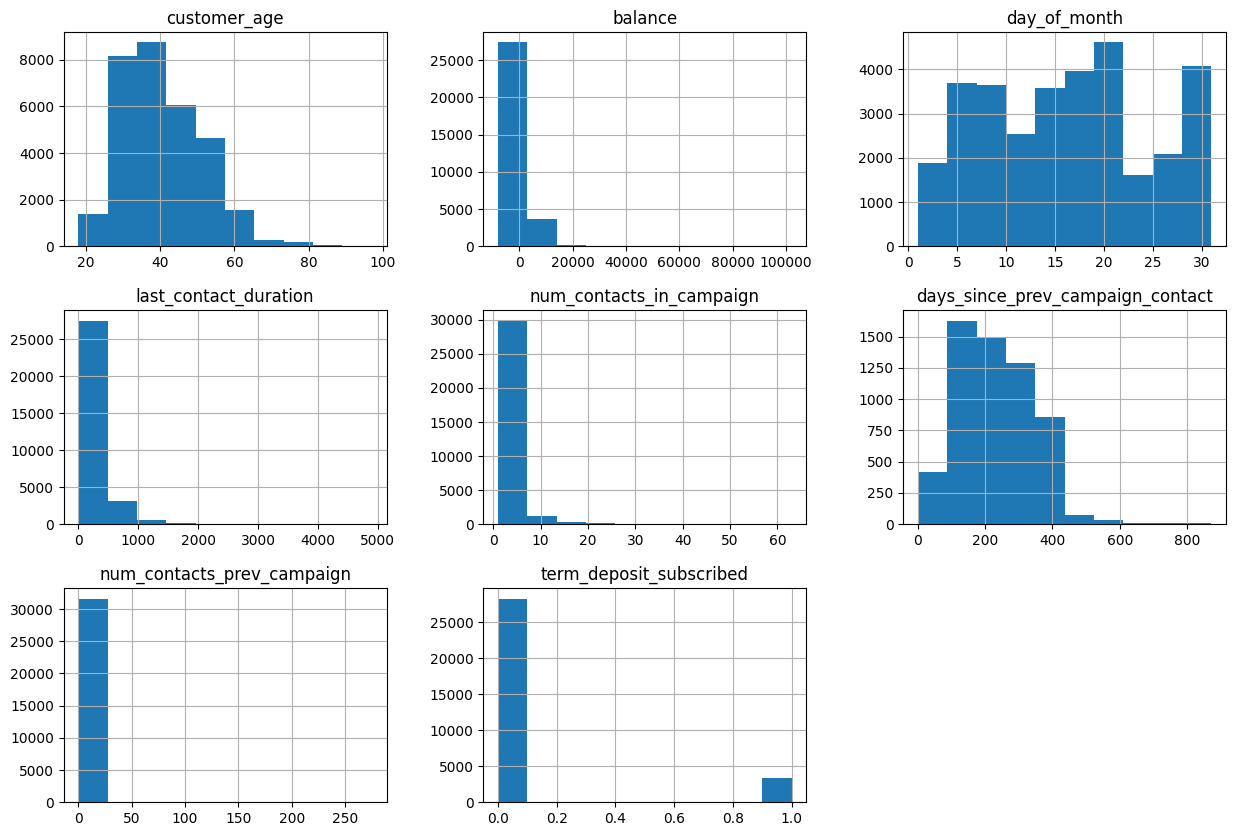

In [28]:
numerical.hist(figsize=(15,10))
print(numerical.skew())
plt.show()

The histogram plot shows the distribution of numerical features and skewness values are also displayed. Features are moderately and highly skewed.


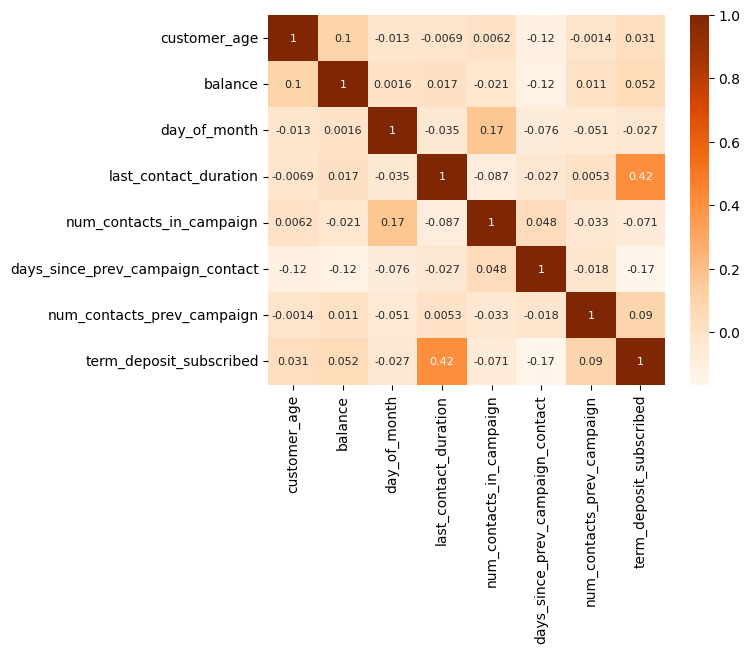

In [29]:
# display correlation of numerical features
sns.heatmap(numerical.corr(),annot=True, cmap='Oranges',annot_kws={'size':8})
plt.show()

Fairly low correlation among the features. Positive correlation is among the following:
1. Customer Age and Balance
2. Day of month and number of contacts in campaign
3. Last contact duration and term deposit subcribed shows a correlation coefficient of 0.42

**Univariant Analysis**

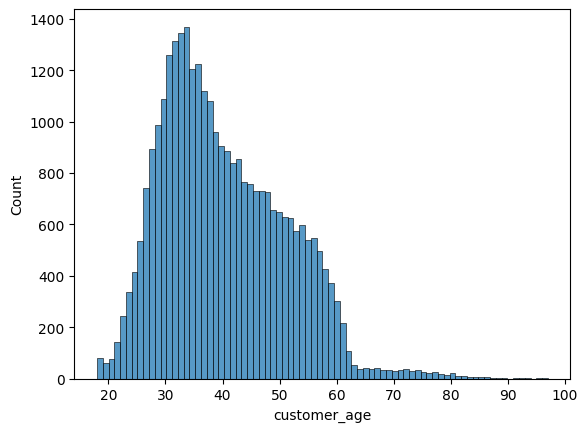

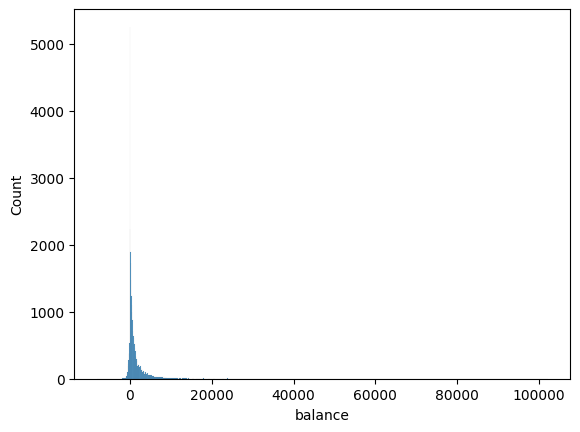

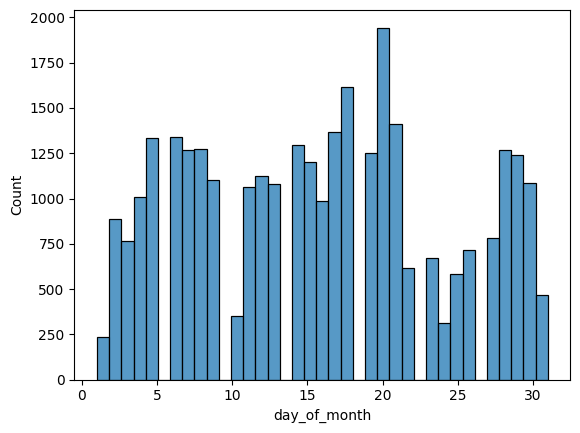

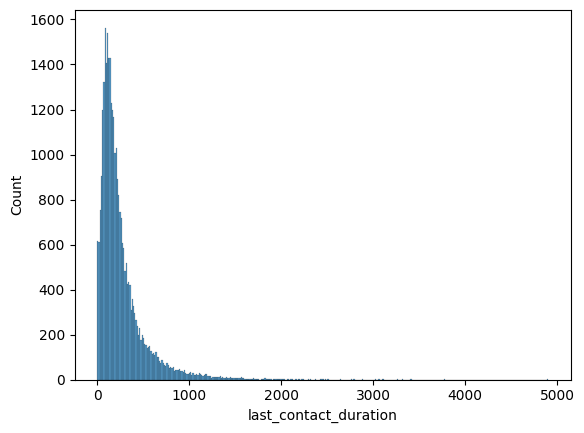

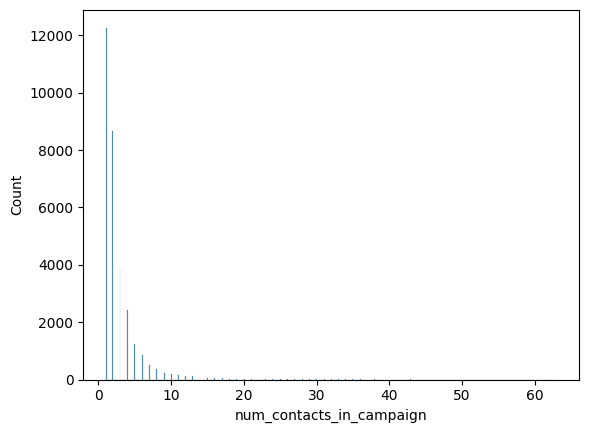

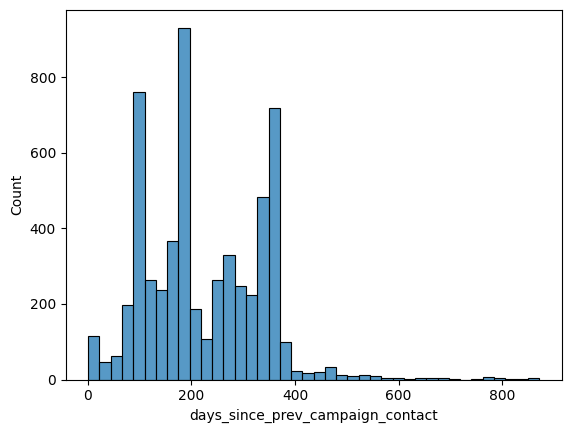

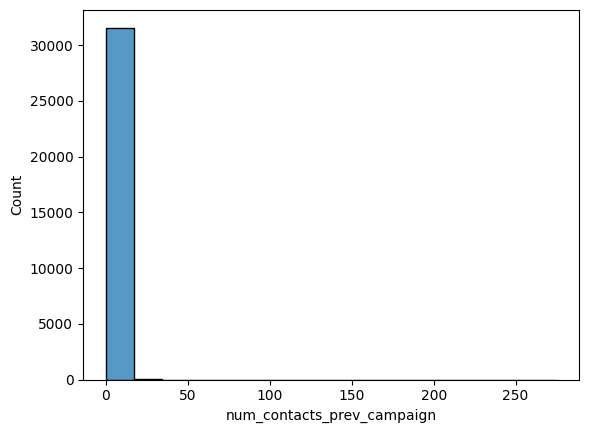

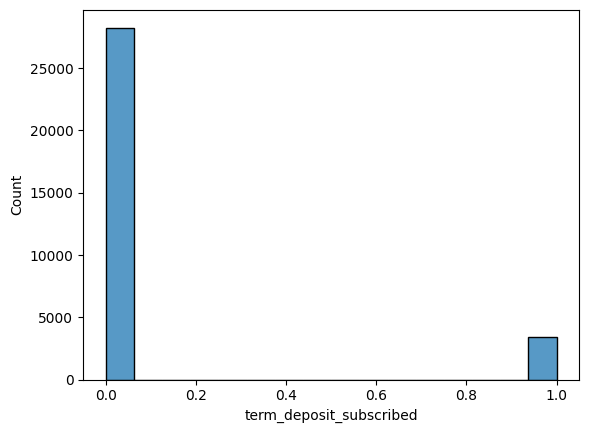

In [30]:
for i in numerical:
  sns.histplot(data=numerical, x=i)
  plt.show()


Seaborn histogram plot shows a clearer picture of the distribution for the numerical features.

Most of the customers are:
1. in the age group of 30-40
2. Have Balances below 20000
3. Contacted around 20th of the month
4. Call duration less than 1000 secs
5. Contacted upto 10 times
6. Around 200 days ie. 7 months since previous campaign contact
7. Number of contacts in previous campaign is less than 50
8. Majority have not subscribed to term deposits



**Bivariant Analysis**

Relation of numerical features with Term deposit Subscribed using boxplot

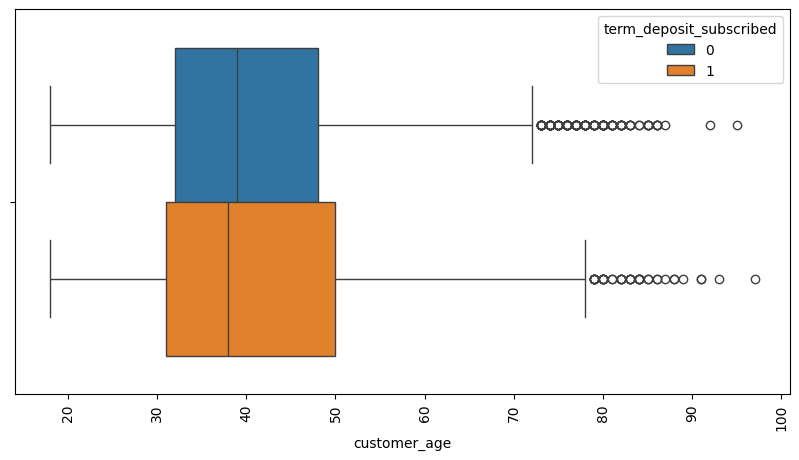

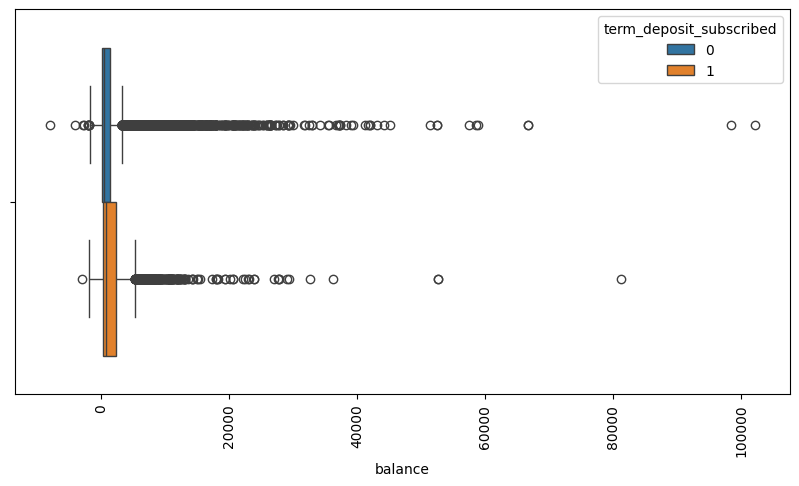

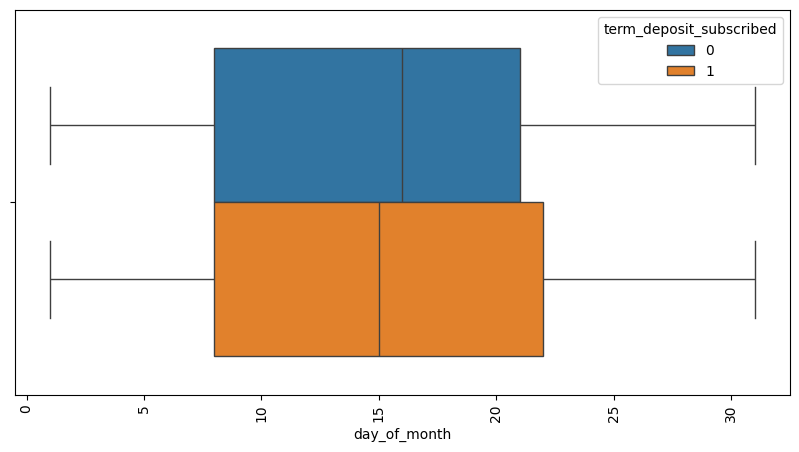

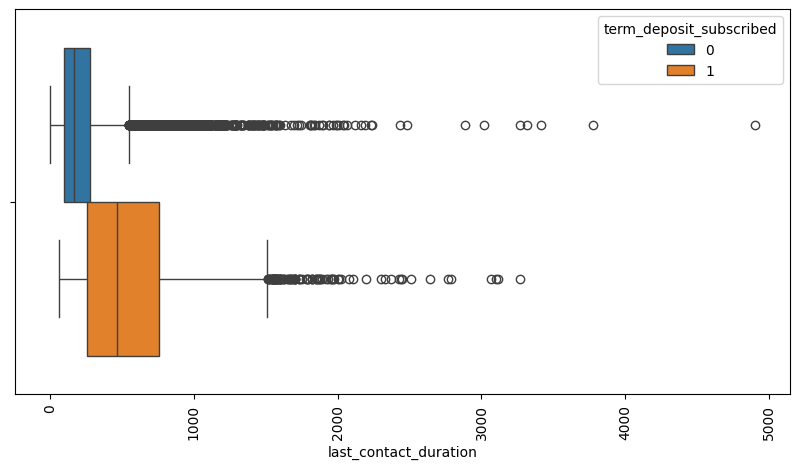

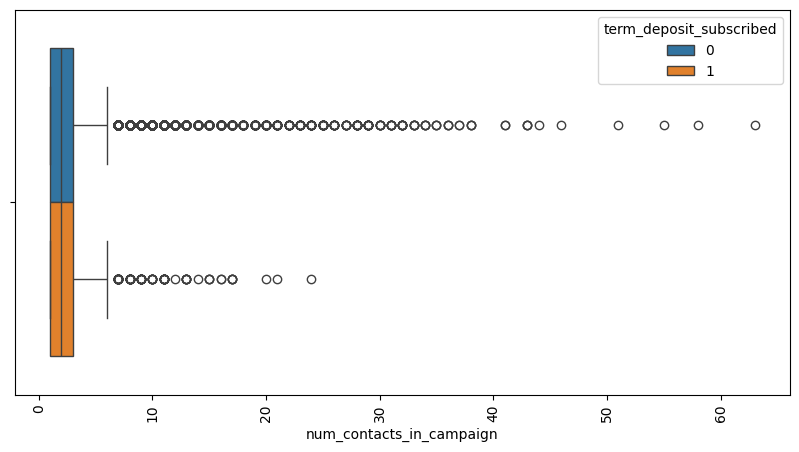

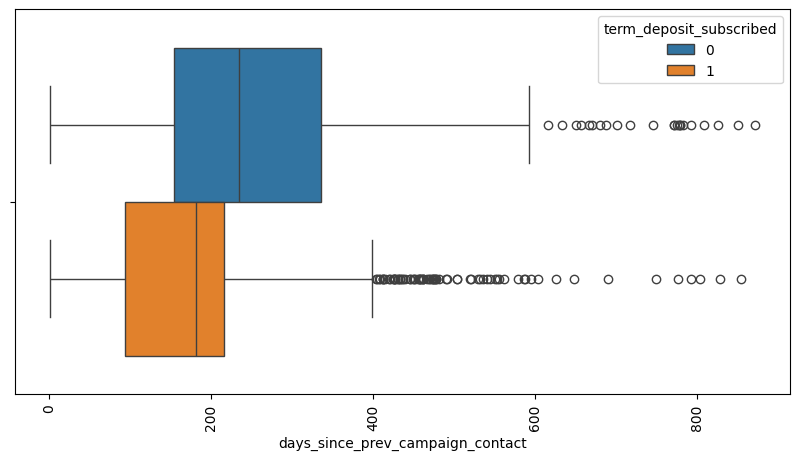

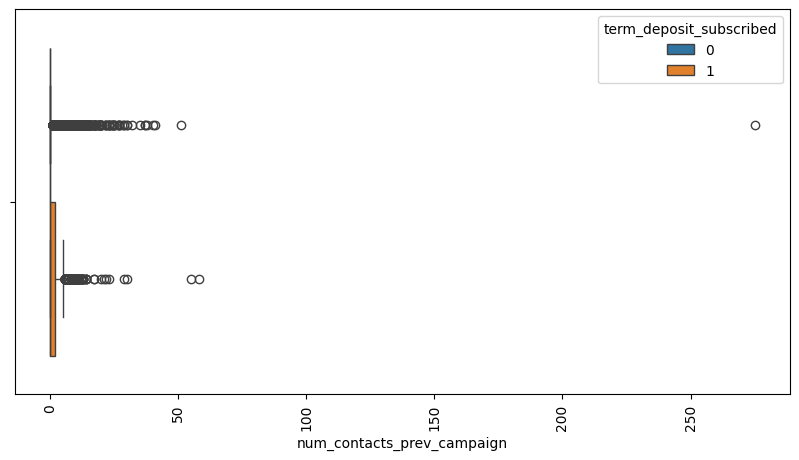

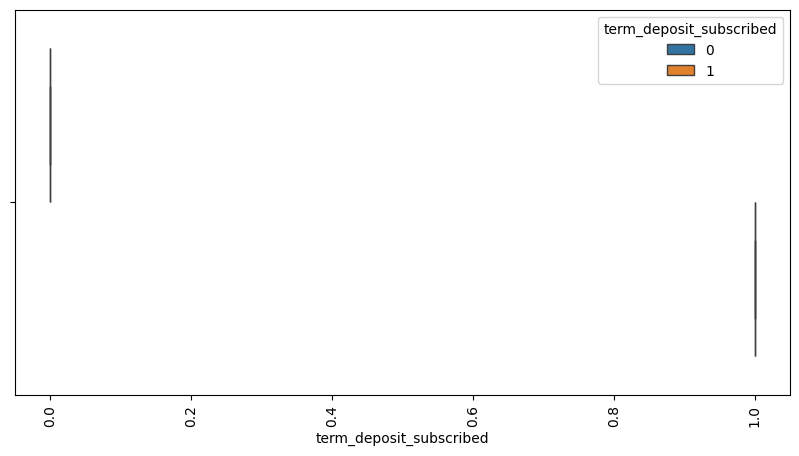

In [31]:
for i in numerical:
  plt.figure(figsize = (10, 5))
  sns.boxplot(x=i, data = numerical ,hue='term_deposit_subscribed')
  plt.xticks(rotation=90)
  plt.show()

All numerical features expect day of month have outliers present which will be treated using IQR.

1. Age ranging from 30-50 have subscribed to term deposits
2. Those contacted between 7th and 22nd of month subscribed to term deposits
3. More contact duration have subscribed to term deposits
4. More days since previous campaign contact had lesser subscription

Handling missing values in numerical features

In [32]:
numerical.isna().sum()

customer_age                          619
balance                               399
day_of_month                            0
last_contact_duration                 311
num_contacts_in_campaign              112
days_since_prev_campaign_contact    25831
num_contacts_prev_campaign              0
term_deposit_subscribed                 0
dtype: int64

5 numerical features with missing values. Dropping 'days since prev campaign contact' from Train dataset since many are missing and could influence the subscription as seen in the boxplot.

In [33]:
dtrain.drop('days_since_prev_campaign_contact', axis=1,inplace=True)

remaining missing values will be filled with median

In [34]:
dtrain.isnull().sum()

customer_age                  619
job_type                        0
marital                       150
education                       0
default                         0
balance                       399
housing_loan                    0
personal_loan                 149
communication_type              0
day_of_month                    0
month                           0
last_contact_duration         311
num_contacts_in_campaign      112
num_contacts_prev_campaign      0
prev_campaign_outcome           0
term_deposit_subscribed         0
dtype: int64

In [35]:
dtrain['customer_age'].fillna(dtrain['customer_age'].median(),inplace=True)
dtrain['balance'].fillna(dtrain['balance'].median(),inplace=True)
dtrain['last_contact_duration'].fillna(dtrain['last_contact_duration'].median(),inplace=True)
dtrain['num_contacts_in_campaign'].fillna(dtrain['num_contacts_in_campaign'].median(),inplace=True)

In [36]:
dtrain.select_dtypes(include=['int64','float64']).skew()             # skewed distribution

customer_age                   0.676055
balance                        8.555899
day_of_month                   0.091909
last_contact_duration          3.185937
num_contacts_in_campaign       5.009996
num_contacts_prev_campaign    45.833007
term_deposit_subscribed        2.538727
dtype: float64

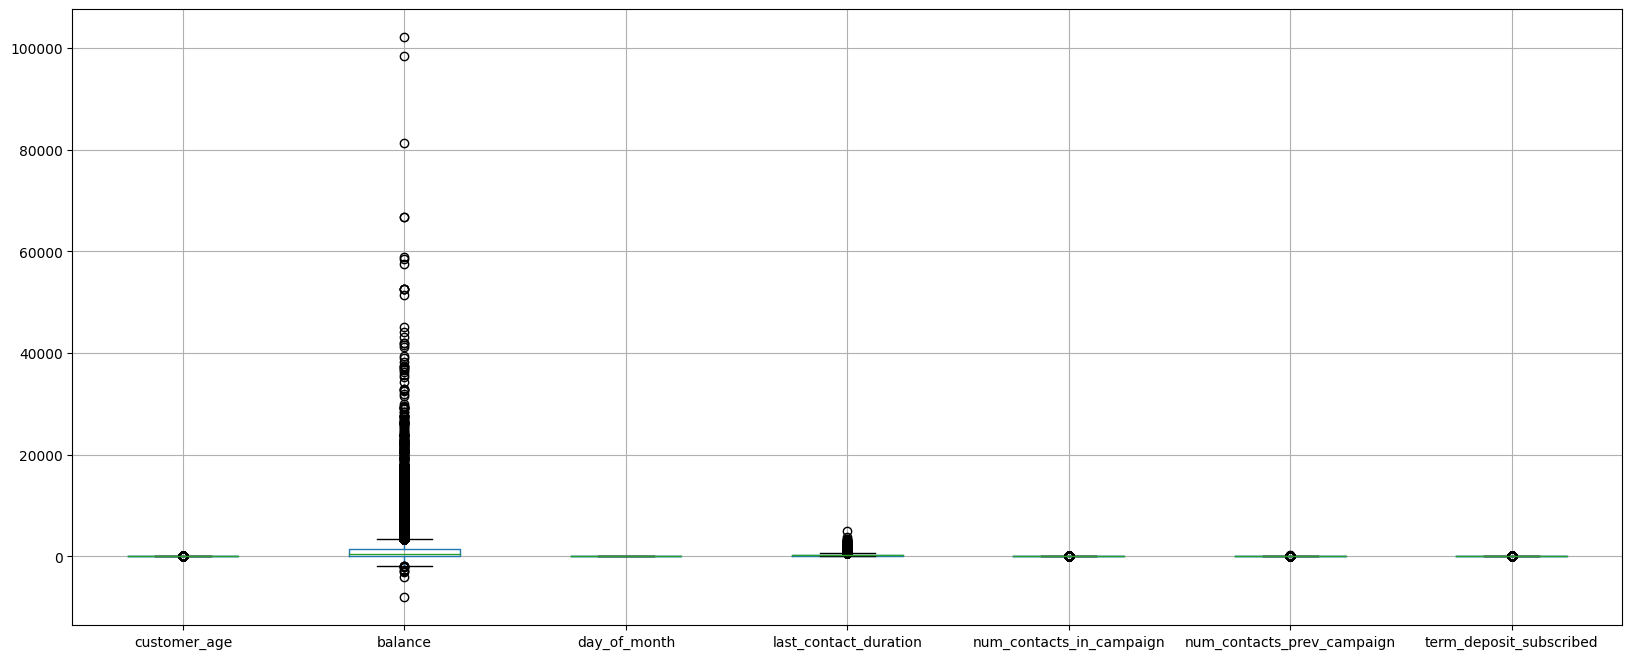

In [37]:
dtrain.boxplot(figsize=(20,8))
plt.show()

Clustering Algorithms are sensitive to outliers and hence will treat these outliers using the IQR method

In [38]:
numerical=dtrain[['customer_age', 'balance', 'day_of_month', 'last_contact_duration',
       'num_contacts_in_campaign', 'num_contacts_prev_campaign']]

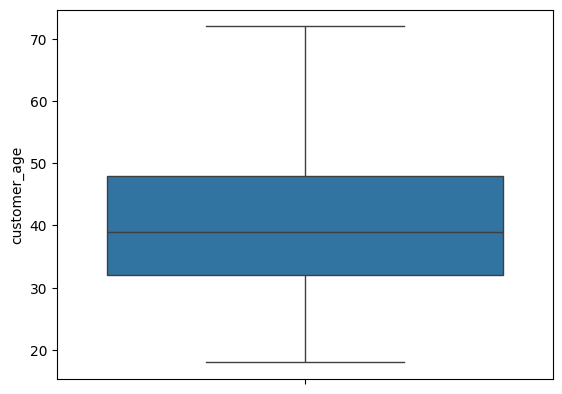

0.5530319940381051




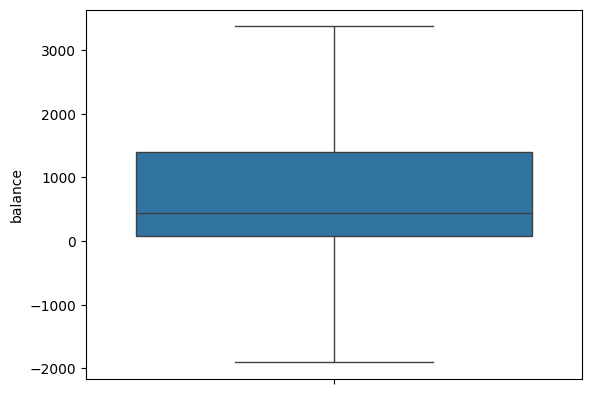

1.0913153890165883




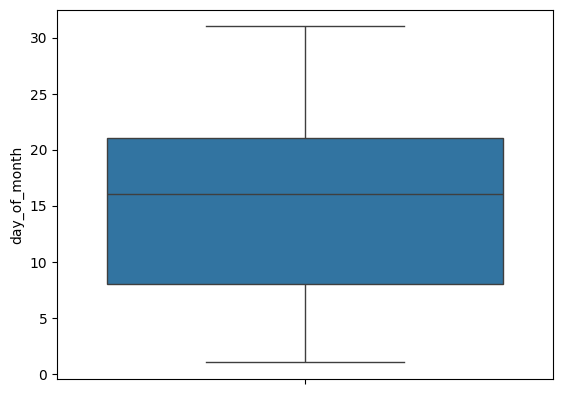

0.09190899020750912




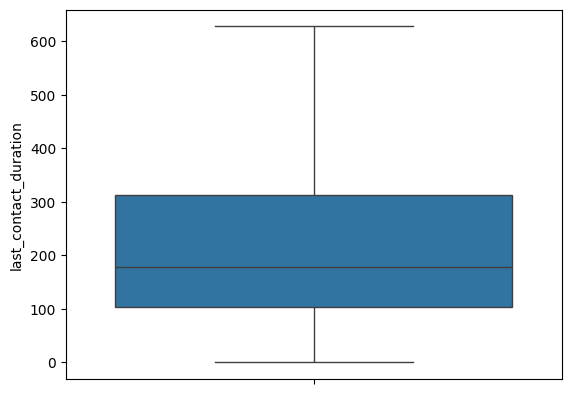

1.019332424794257




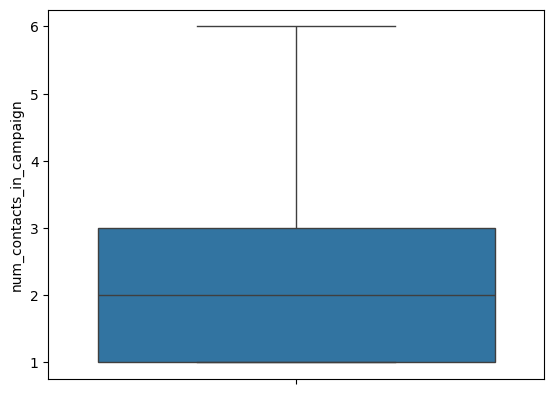

1.1003389042683551




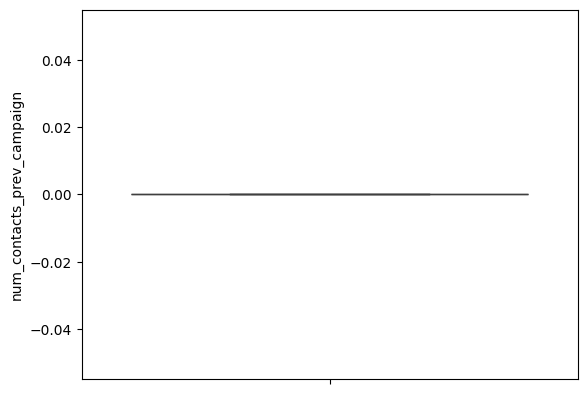

0




In [39]:
for i in numerical:
  q1=dtrain[i].quantile(0.25)
  q3=dtrain[i].quantile(0.75)
  iqr=q3-q1
  low_lim=q1-(1.5*iqr)
  up_lim=q3+(1.5*iqr)
  outliers = []
  for h in dtrain[i]:
    if ((h < low_lim) | (h > up_lim)):
      outliers.append(h)
      dtrain[i]=dtrain[i].clip(lower=low_lim,upper=up_lim)
  sns.boxplot(dtrain[i])
  plt.show()
  print(dtrain[i].skew())
  print('\n')

Outliers are removed and the feature *num of contacts in prev campaign* is reduced to 0. This feature can be removed later on for feature reduction.

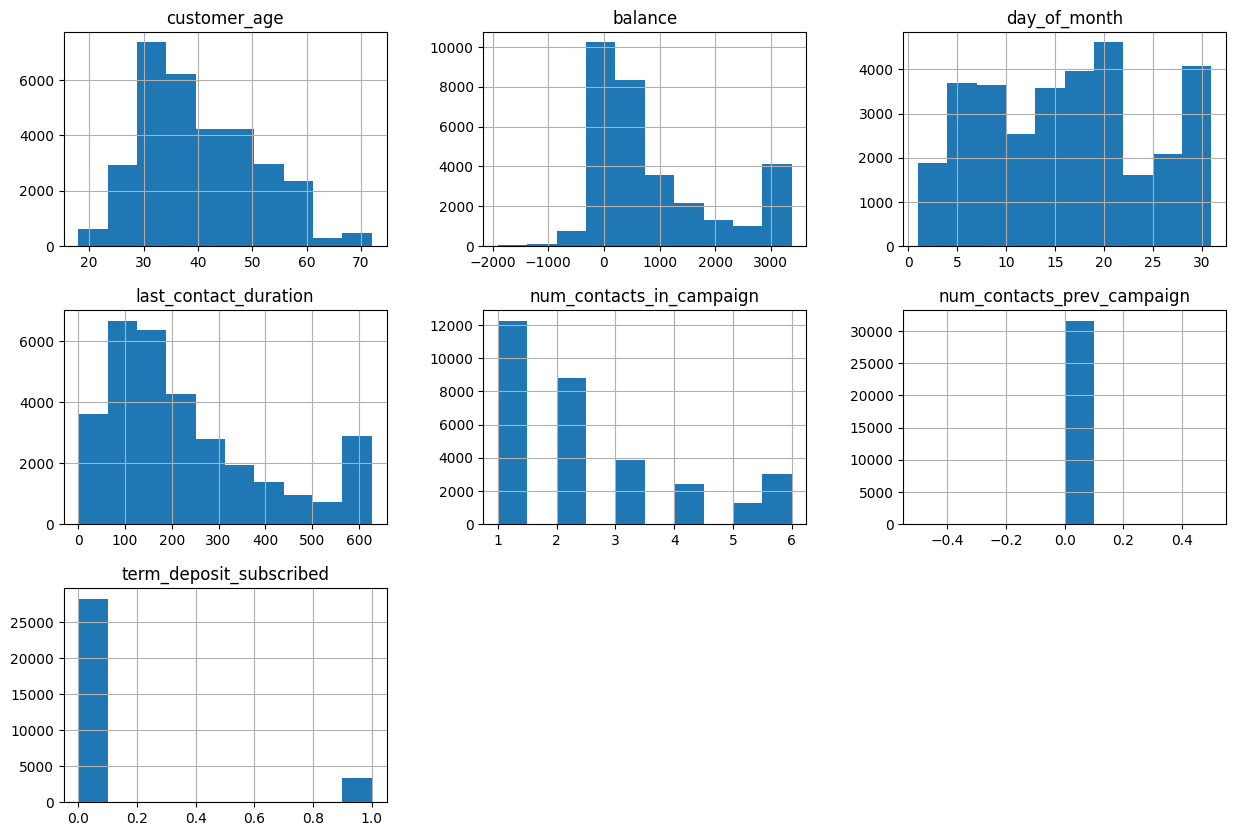

In [40]:
dtrain.hist(figsize=(15,10))
plt.show()

**EDA of categorical features**

Univariant Analysis using piechart

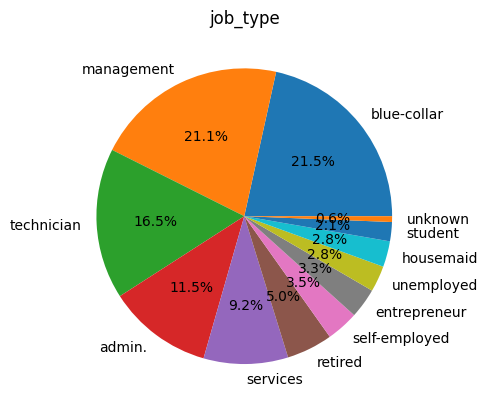

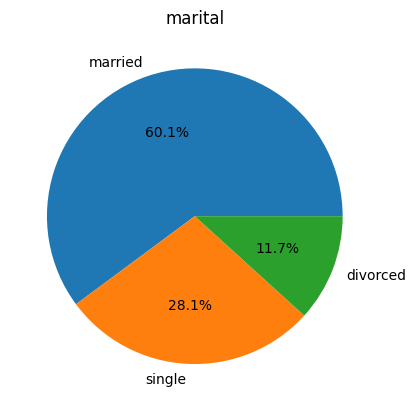

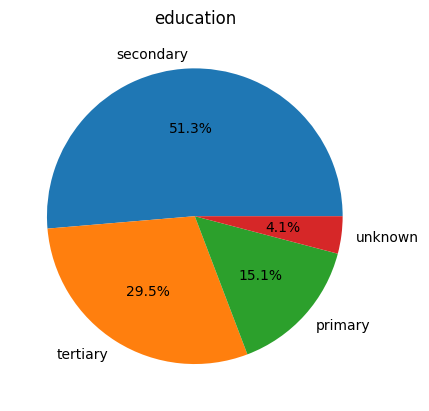

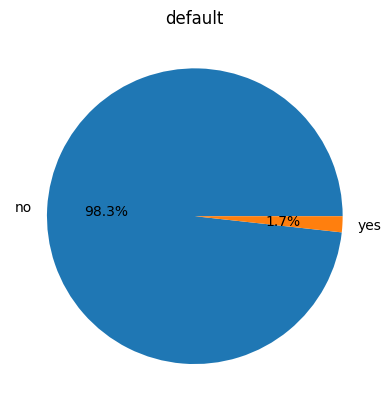

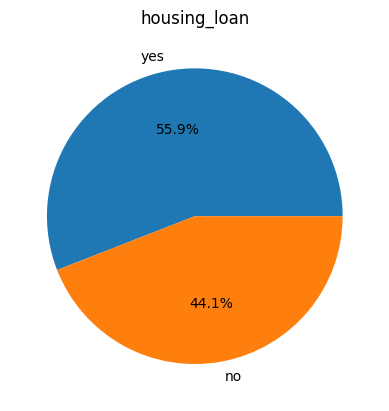

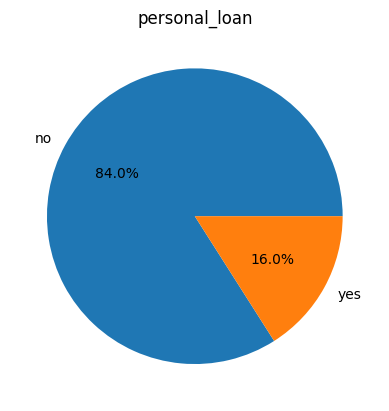

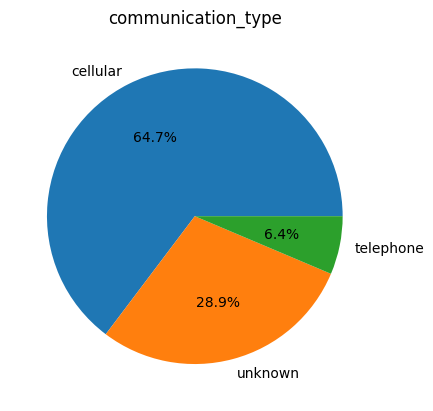

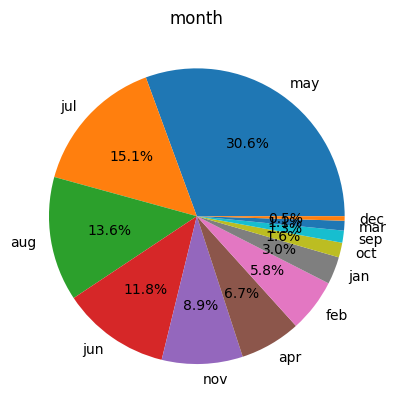

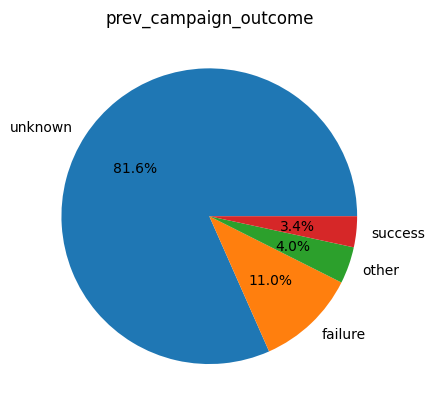

In [65]:
for i in categorical:
  plt.pie(x=categorical[i].value_counts(),labels=categorical[i].value_counts().index,autopct='%1.1f%%')
  plt.title(i)
  plt.show()

Above piecharts show:

21.5% of customers have a blue-collar job, 21% are management professionals and
16% are technicians.

60% customers are married, 28% are single and 11% are divorced.

51% customers have had secondary level of education, 29.5% with tertiary level of education

98% customers have not defaulted

55% of customers have housing loan and 84% have taken personal loan

64.7 % were contacted via cellular mode, 29% unknown

30% of customers were contacted in the month of May and 15% in July and least in December

Only 3.4 % success rate outcome of previous campaign, 11% failed outcomes and 81 % are unknown




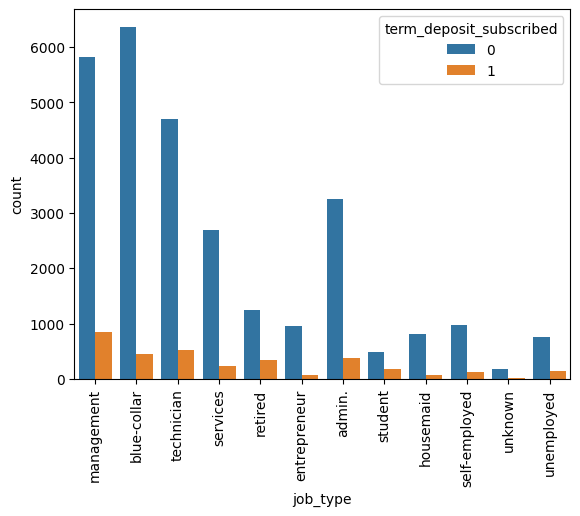

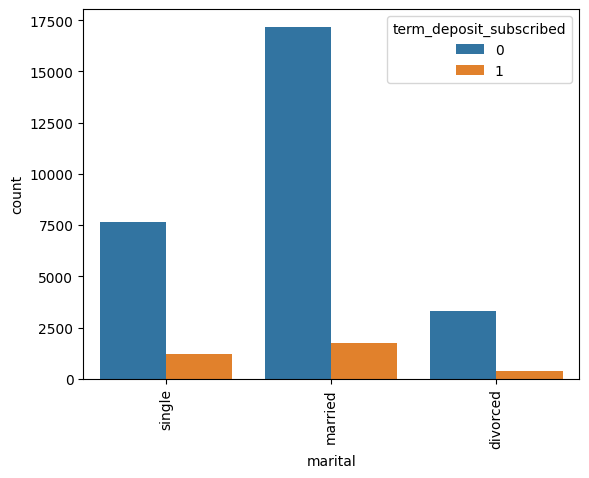

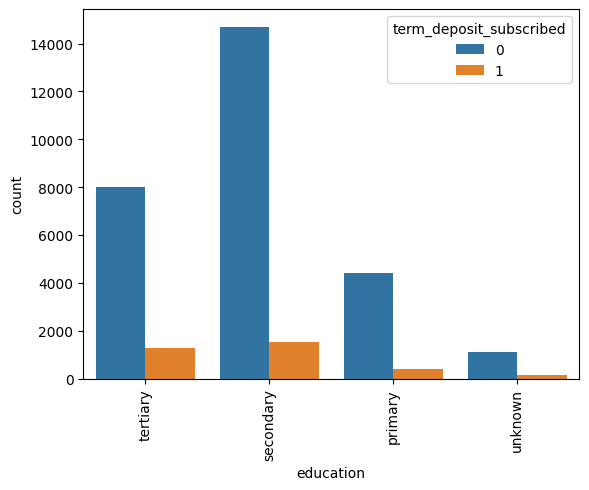

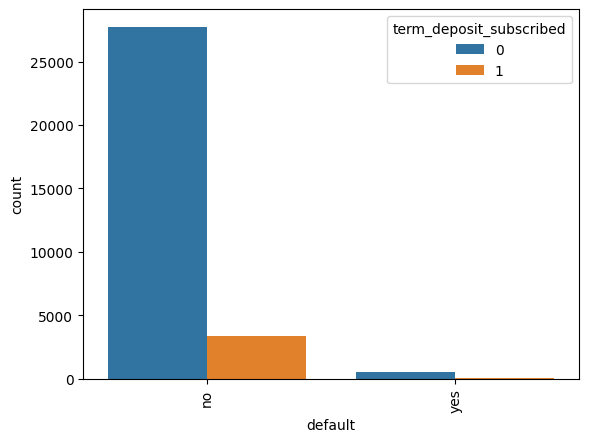

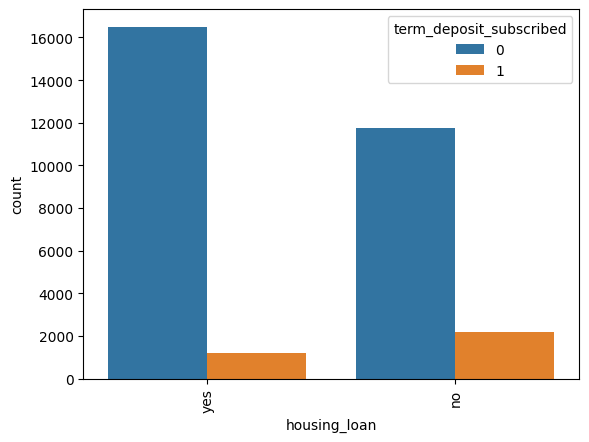

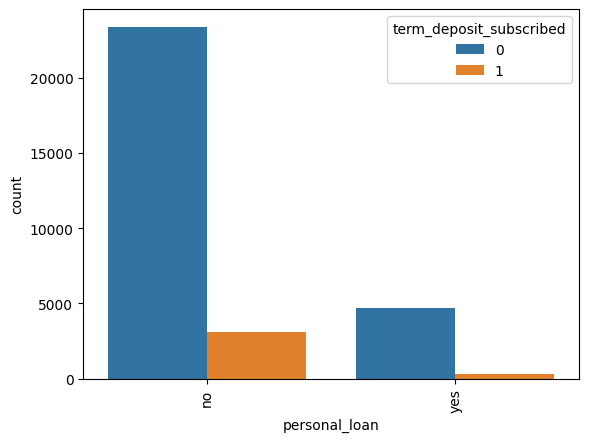

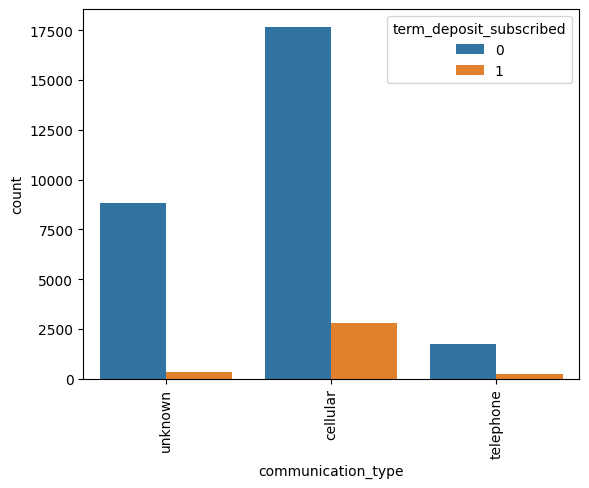

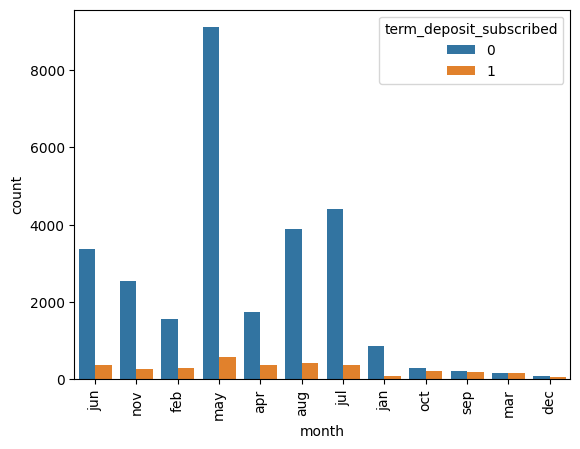

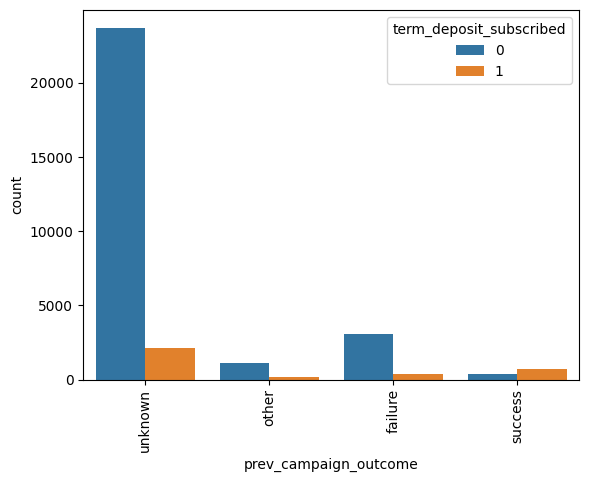

In [51]:
for i in categorical:
  sns.countplot(data=categorical, x=i, hue=dtrain['term_deposit_subscribed'])
  plt.xticks(rotation=90)
  plt.show()

**Countplot of categorical features vs term deposit subscribed show:**

Customers who opted more term deposits were management professionals, were
married, hold secondary education level, no default, those who didnt have housing loan and personal loan.

Customers who were contacted via cellular communication, contacted in the month of May and unknown outcome of previous campaign.

**Check for missing values**

In [66]:
categorical.isna().sum()

job_type                   0
marital                  150
education                  0
default                    0
housing_loan               0
personal_loan            149
communication_type         0
month                      0
prev_campaign_outcome      0
dtype: int64

using mode for null values imputation

In [67]:
dtrain['marital'].fillna(dtrain['marital'].mode()[0],inplace=True)
dtrain['personal_loan'].fillna(dtrain['personal_loan'].mode()[0],inplace=True)

In [68]:
dtrain.isna().sum()

customer_age                  0
job_type                      0
marital                       0
education                     0
default                       0
balance                       0
housing_loan                  0
personal_loan                 0
communication_type            0
day_of_month                  0
month                         0
last_contact_duration         0
num_contacts_in_campaign      0
num_contacts_prev_campaign    0
prev_campaign_outcome         0
term_deposit_subscribed       0
dtype: int64

**All missing values, outliers and visualizations are done for the train dataset**

**Analyse the Test Dataset**

In [69]:
num=dtest.select_dtypes(include=['int64','float64'])
cat=dtest.select_dtypes(include=['object'])

In [70]:
num.columns

Index(['customer_age', 'balance', 'day_of_month', 'last_contact_duration',
       'num_contacts_in_campaign', 'days_since_prev_campaign_contact',
       'num_contacts_prev_campaign'],
      dtype='object')

In [71]:
cat.columns

Index(['job_type', 'marital', 'education', 'default', 'housing_loan',
       'personal_loan', 'communication_type', 'month',
       'prev_campaign_outcome'],
      dtype='object')

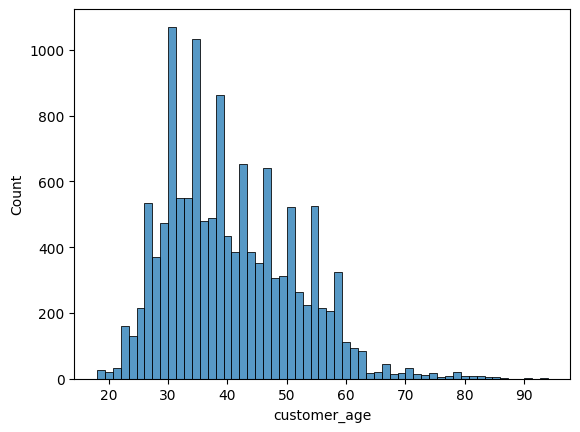

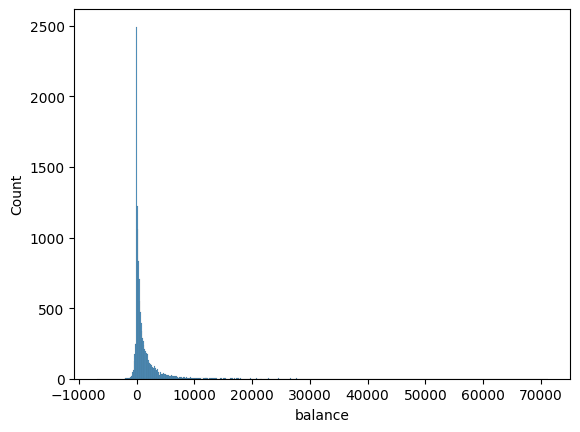

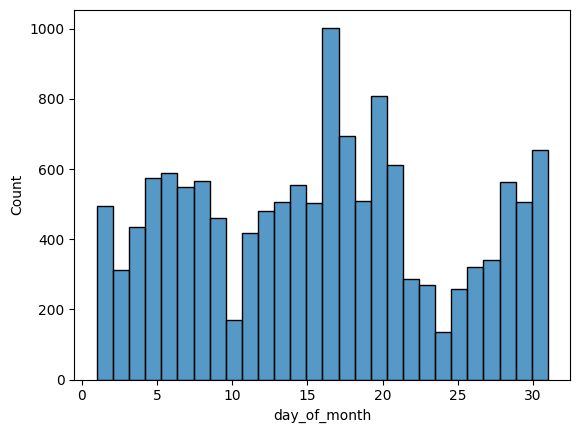

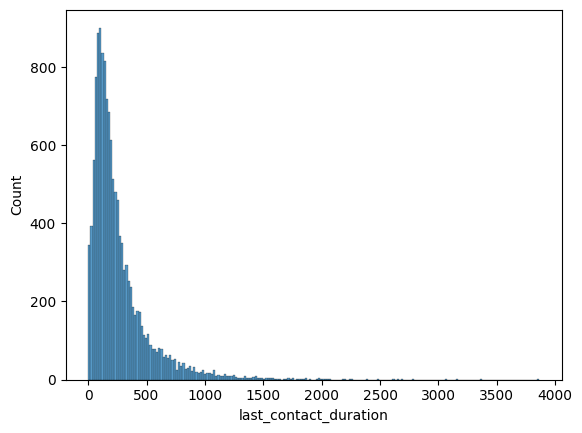

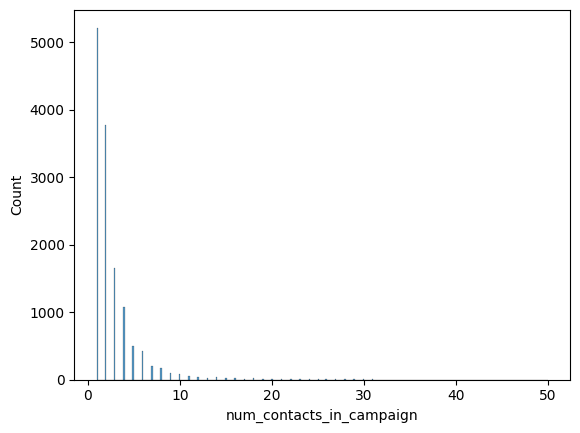

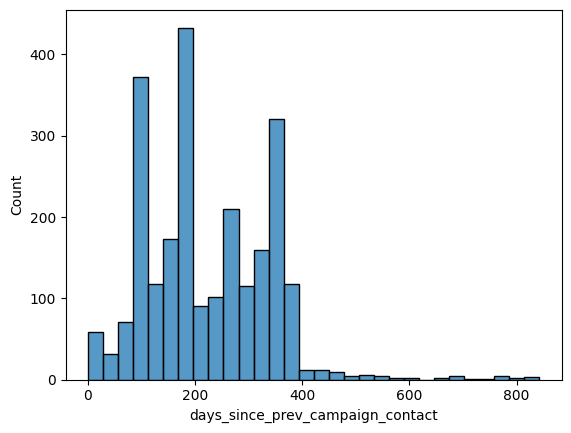

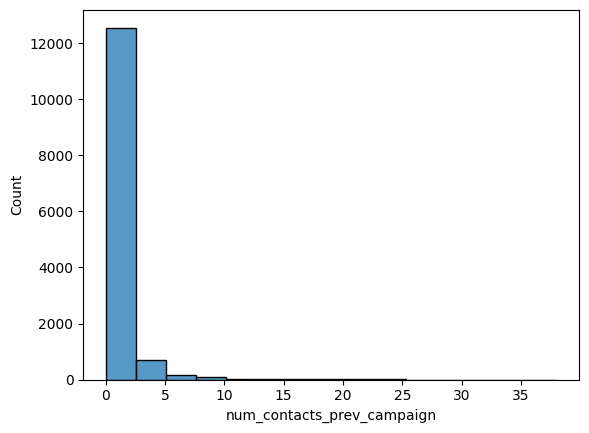

In [74]:
for i in num:
  sns.histplot(data=num, x=i)
  plt.show()

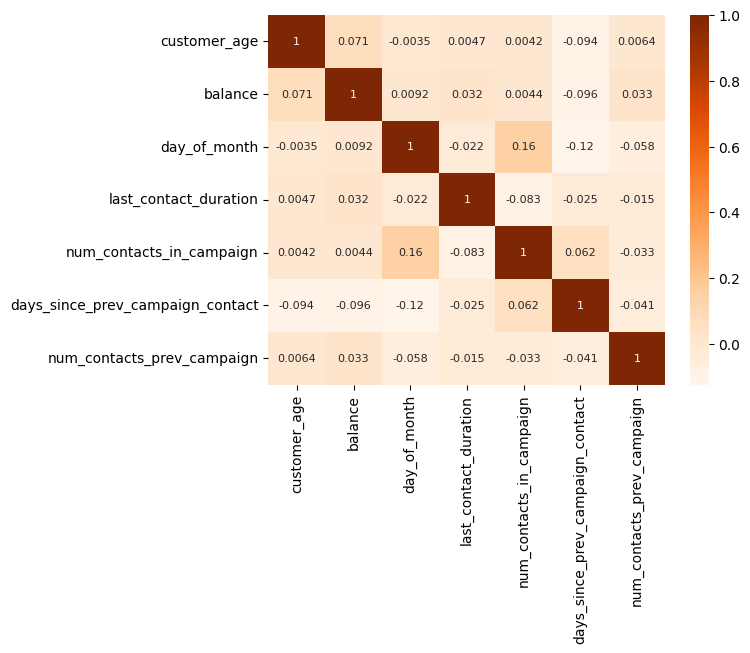

In [79]:
sns.heatmap(num.corr(),annot=True, cmap='Oranges',annot_kws={'size':8})
plt.show()

low correlation among numerical features

Check for missing values

In [78]:
num.isna().sum()

customer_age                          270
balance                               181
day_of_month                            0
last_contact_duration                 122
num_contacts_in_campaign               45
days_since_prev_campaign_contact    11123
num_contacts_prev_campaign              0
dtype: int64

lot of missing values in 'days since prev campaign contact' and hence will drop the column from Test data

In [80]:
dtest.drop('days_since_prev_campaign_contact', axis=1,inplace=True)

Impute missing features using median

In [82]:
dtest['customer_age'].fillna(dtest['customer_age'].median(),inplace=True)
dtest['balance'].fillna(dtest['balance'].median(),inplace=True)
dtest['last_contact_duration'].fillna(dtest['last_contact_duration'].median(),inplace=True)
dtest['num_contacts_in_campaign'].fillna(dtest['num_contacts_in_campaign'].median(),inplace=True)

In [84]:
num_cols=['customer_age', 'balance', 'day_of_month', 'last_contact_duration',
       'num_contacts_in_campaign', 'num_contacts_prev_campaign']

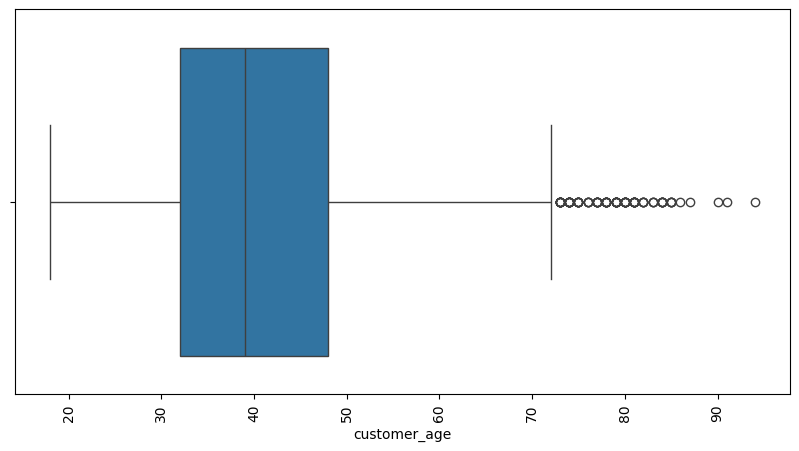

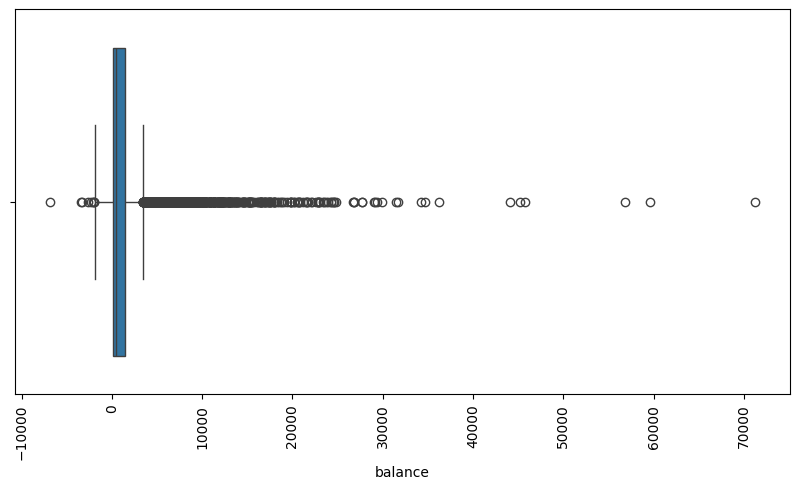

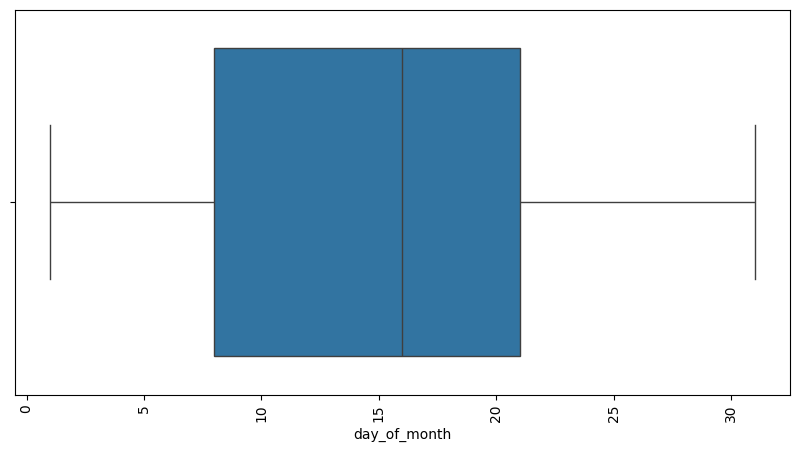

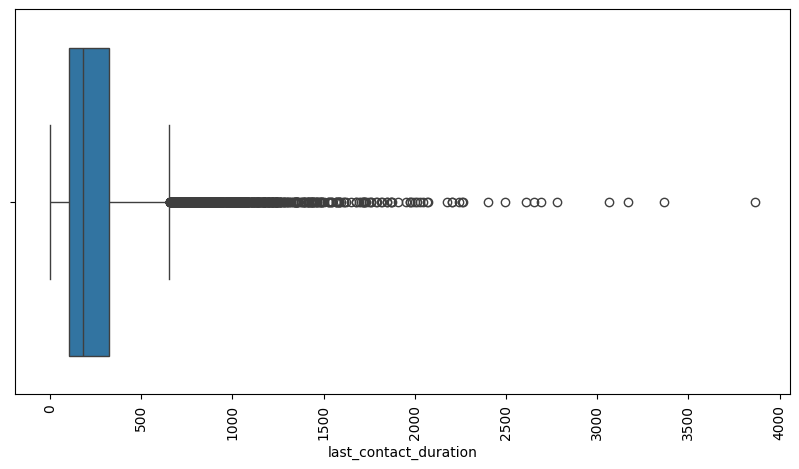

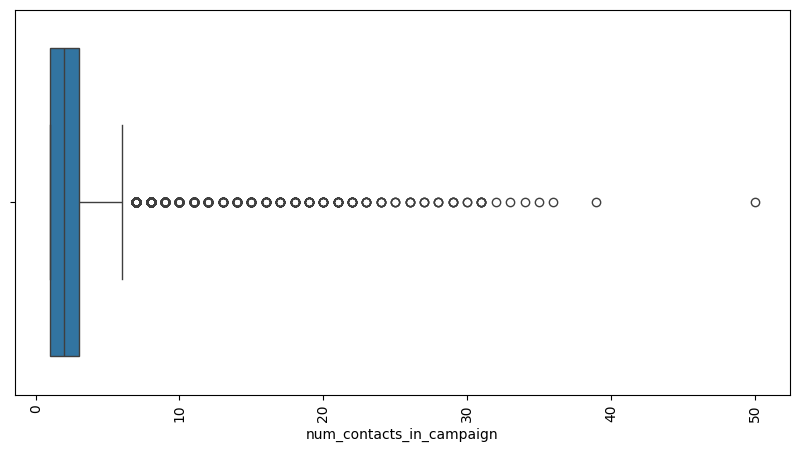

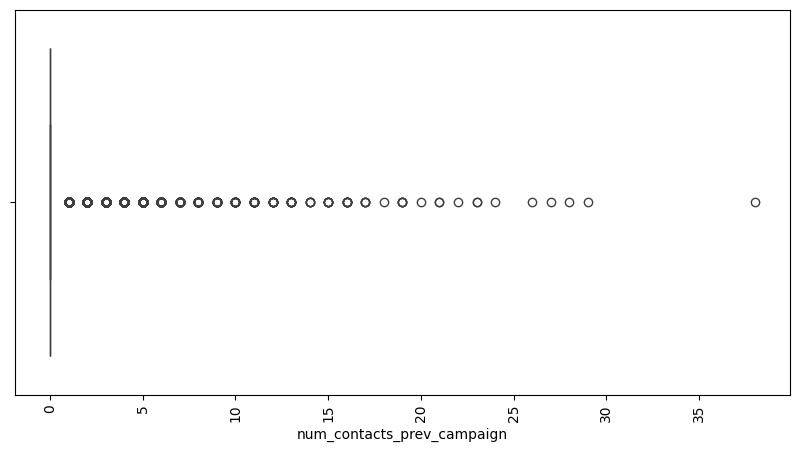

In [85]:
for i in num_cols:
  plt.figure(figsize = (10, 5))
  sns.boxplot(x=i, data = dtest)
  plt.xticks(rotation=90)
  plt.show()

Handle outliers using IQR method

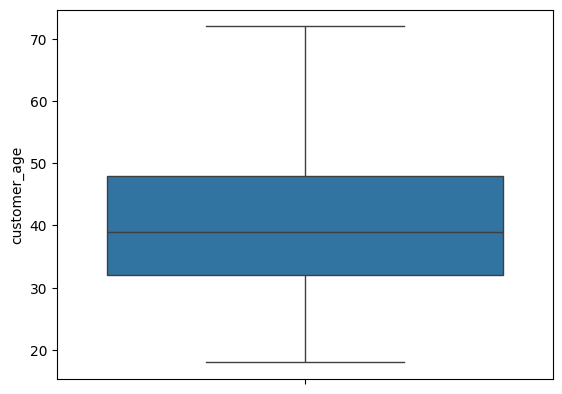

0.5559919900107957




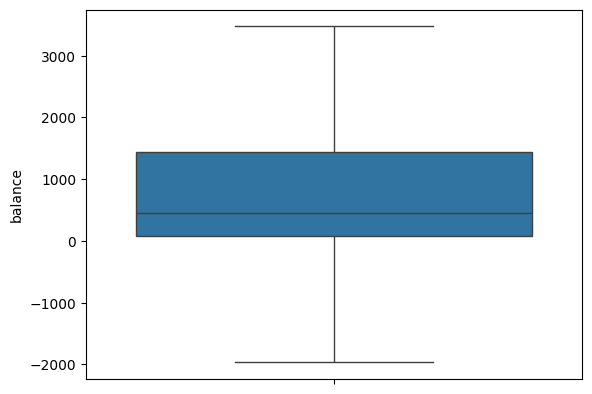

1.1037359119899657




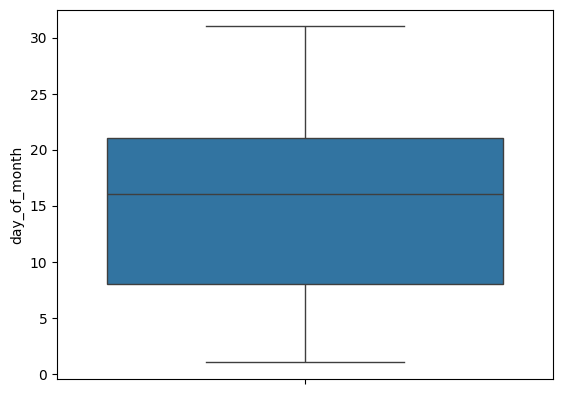

0.09581935056612031




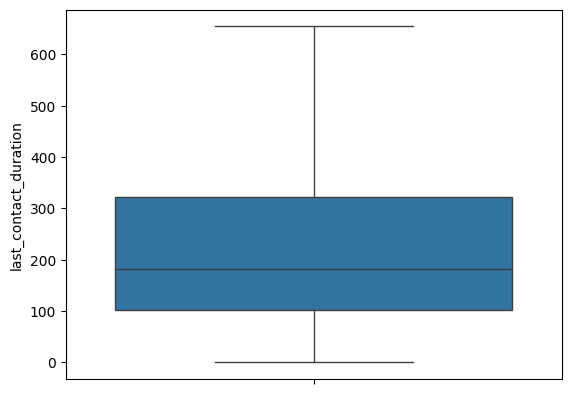

1.0436152370307785




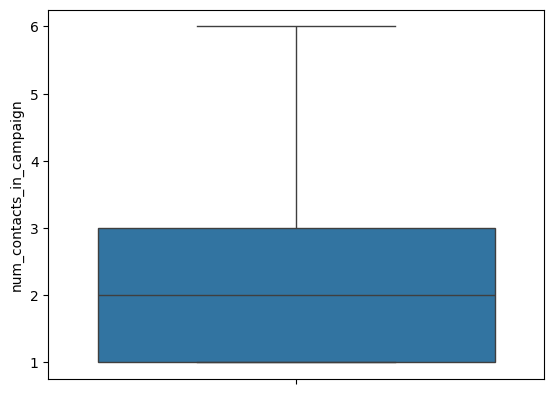

1.1095022079226131




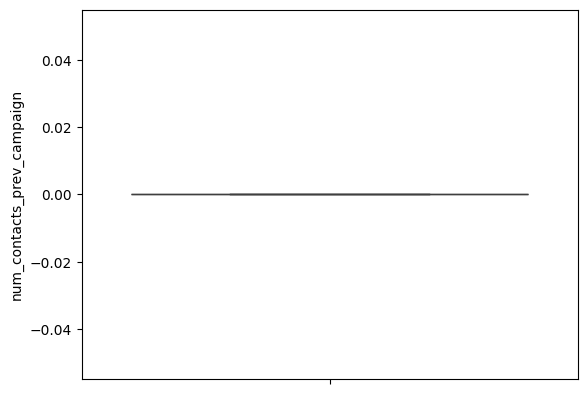

0




In [86]:
for i in num_cols:
  q1=dtest[i].quantile(0.25)
  q3=dtest[i].quantile(0.75)
  iqr=q3-q1
  low_lim=q1-(1.5*iqr)
  up_lim=q3+(1.5*iqr)
  outliers = []
  for h in dtest[i]:
    if ((h < low_lim) | (h > up_lim)):
      outliers.append(h)
      dtest[i]=dtest[i].clip(lower=low_lim,upper=up_lim)
  sns.boxplot(dtest[i])
  plt.show()
  print(dtest[i].skew())
  print('\n')

Missing values and outliers are handled of numerical features in Test dataset

Analyse Categorical features

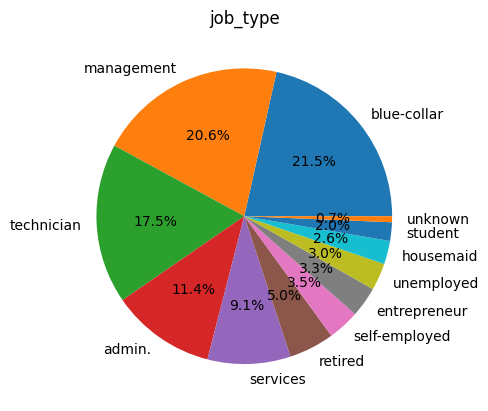

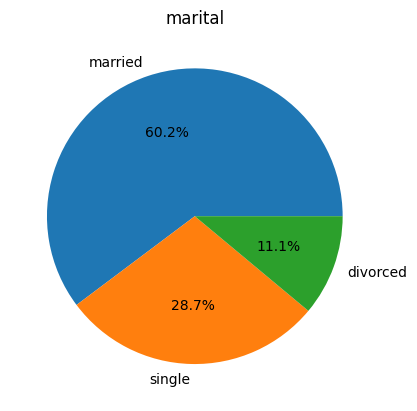

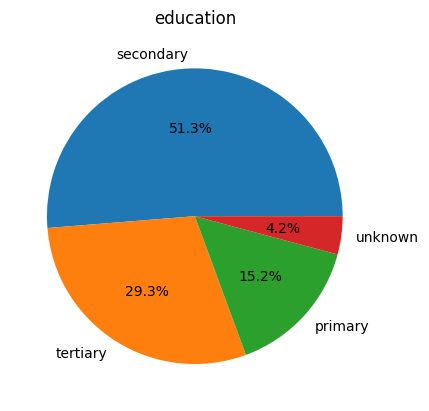

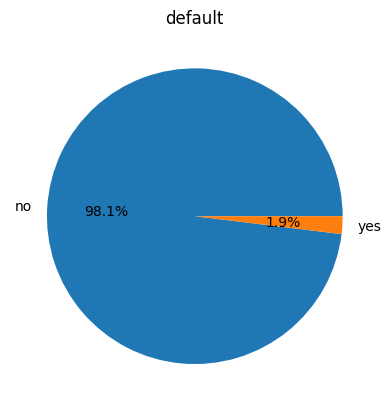

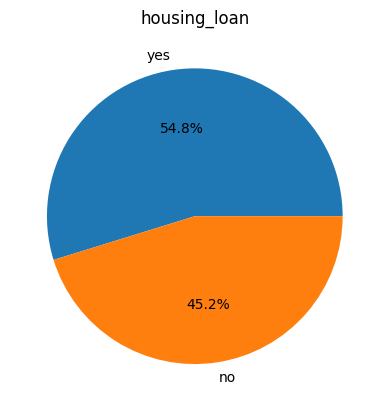

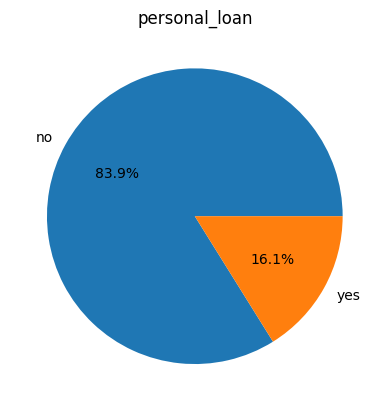

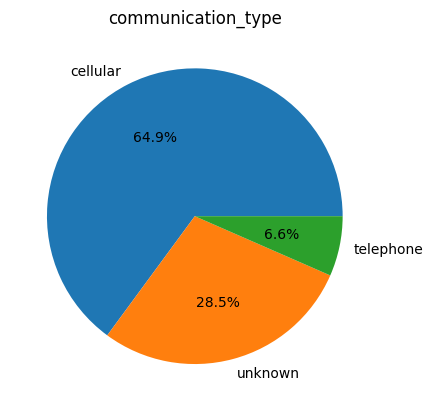

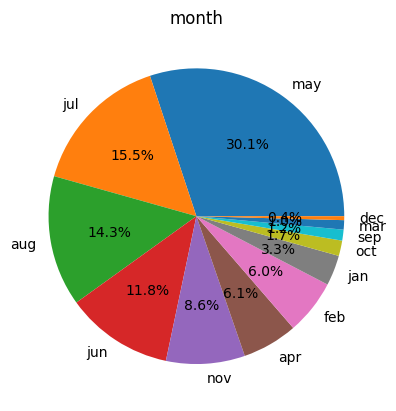

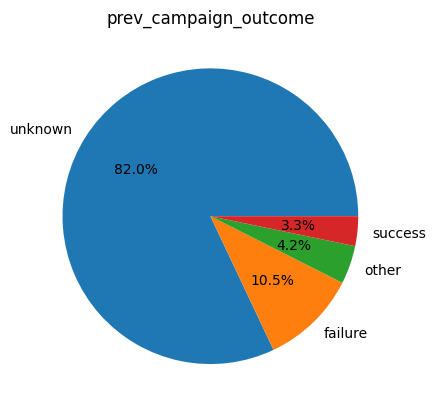

In [87]:
for i in cat:
  plt.pie(x=cat[i].value_counts(),labels=cat[i].value_counts().index,autopct='%1.1f%%')
  plt.title(i)
  plt.show()

Categorical features show similar distribution like the Train dataset across the features

Check for missing values in categorical features

In [88]:
cat.isna().sum()

job_type                  0
marital                  81
education                 0
default                   0
housing_loan              0
personal_loan            74
communication_type        0
month                     0
prev_campaign_outcome     0
dtype: int64

Impute the above 2 features with missings values using mode

In [89]:
dtest['marital'].fillna(dtest['marital'].mode()[0],inplace=True)
dtest['personal_loan'].fillna(dtest['personal_loan'].mode()[0],inplace=True)

In [90]:
dtest.isna().sum()

customer_age                  0
job_type                      0
marital                       0
education                     0
default                       0
balance                       0
housing_loan                  0
personal_loan                 0
communication_type            0
day_of_month                  0
month                         0
last_contact_duration         0
num_contacts_in_campaign      0
num_contacts_prev_campaign    0
prev_campaign_outcome         0
dtype: int64

Missing values and outliers are handled for Test Dataset

In [93]:
dtrain.head()

,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
id,,,,,,,,,,,,,,,,
id_43823,28.0,management,single,tertiary,no,285.0,yes,no,unknown,26,jun,303.0,4.0,0,unknown,0
id_32289,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,18,nov,143.0,2.0,0,other,0
id_10523,46.0,technician,married,secondary,no,656.0,no,no,cellular,5,feb,101.0,4.0,0,unknown,0
id_43951,34.0,services,single,secondary,no,2.0,yes,no,unknown,20,may,127.0,3.0,0,unknown,0
id_40992,41.0,blue-collar,married,primary,no,1352.0,yes,no,cellular,13,may,49.0,2.0,0,unknown,0


In [94]:
dtest.head()

,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome
id,,,,,,,,,,,,,,,
id_17231,55.0,retired,married,tertiary,no,3475.625,no,no,cellular,13,aug,90.0,2.0,0,unknown
id_34508,24.0,blue-collar,single,secondary,no,179.000,yes,no,cellular,18,may,63.0,2.0,0,unknown
id_44504,46.0,technician,divorced,secondary,no,143.000,no,no,cellular,8,jul,208.0,1.0,0,unknown
id_174,56.0,housemaid,single,unknown,no,3475.625,no,no,unknown,6,jun,34.0,1.0,0,unknown
id_2115,62.0,retired,married,secondary,no,2913.000,no,no,cellular,12,apr,127.0,1.0,0,success


**Encode all categorical variables in Train and Test Dataset**

In [95]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in dtrain:
  if dtrain[i].dtype=='object':
    dtrain[i]=le.fit_transform(dtrain[i])

In [96]:
for i in dtest:
  if dtest[i].dtype=='object':
    dtest[i]=le.fit_transform(dtest[i])

In [98]:
dtrain.head()

,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
id,,,,,,,,,,,,,,,,
id_43823,28.0,4,2,2,0,285.0,1,0,2,26,6,303.0,4.0,0,3,0
id_32289,34.0,1,1,1,0,934.0,0,1,0,18,9,143.0,2.0,0,1,0
id_10523,46.0,9,1,1,0,656.0,0,0,0,5,3,101.0,4.0,0,3,0
id_43951,34.0,7,2,1,0,2.0,1,0,2,20,8,127.0,3.0,0,3,0
id_40992,41.0,1,1,0,0,1352.0,1,0,0,13,8,49.0,2.0,0,3,0


In [99]:
dtest.head()

,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome
id,,,,,,,,,,,,,,,
id_17231,55.0,5,1,2,0,3475.625,0,0,0,13,1,90.0,2.0,0,3
id_34508,24.0,1,2,1,0,179.000,1,0,0,18,8,63.0,2.0,0,3
id_44504,46.0,9,0,1,0,143.000,0,0,0,8,5,208.0,1.0,0,3
id_174,56.0,3,2,3,0,3475.625,0,0,2,6,6,34.0,1.0,0,3
id_2115,62.0,5,1,1,0,2913.000,0,0,0,12,0,127.0,1.0,0,2


Normalize the data using Standard Scalar

In [107]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
dtrain=sc.fit_transform(dtrain)
dtest=sc.fit_transform(dtest)
dtrain=pd.DataFrame(dtrain)
dtest=pd.DataFrame(dtest)

In [108]:
dtrain

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-1.179698,-0.098901,1.375799,1.037131,-0.13336,-0.549689,0.887675,-0.434972,1.510595,1.223313,0.155158,0.412064,1.004446,0.0,0.446592,-0.346596
1,-0.607123,-1.018561,-0.268147,-0.300962,-0.13336,0.014888,-1.126539,2.299000,-0.714172,0.262103,1.150889,-0.512908,-0.245046,0.0,-1.568133,-0.346596
2,0.538027,1.433866,-0.268147,-0.300962,-0.13336,-0.226949,-1.126539,-0.434972,-0.714172,-1.299864,-0.840573,-0.755713,1.004446,0.0,0.446592,-0.346596
3,-0.607123,0.820759,1.375799,-0.300962,-0.13336,-0.795875,0.887675,-0.434972,1.510595,0.502405,0.818979,-0.605405,0.379700,0.0,0.446592,-0.346596
4,0.060881,-1.018561,-0.268147,-1.639055,-0.13336,0.378514,0.887675,-0.434972,-0.714172,-0.338654,0.818979,-1.056328,-0.245046,0.0,0.446592,-0.346596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,1.683177,-1.325114,-0.268147,-0.300962,-0.13336,-0.304372,0.887675,-0.434972,-0.714172,-1.660318,-0.840573,-0.767275,-0.245046,0.0,-1.568133,-0.346596
31643,1.015173,-0.098901,-0.268147,1.037131,-0.13336,0.134937,-1.126539,-0.434972,1.510595,0.502405,0.155158,-1.160388,2.253938,0.0,0.446592,-0.346596
31644,0.060881,1.740419,-0.268147,-1.639055,-0.13336,-0.587095,0.887675,-0.434972,1.510595,0.862859,0.818979,-0.825086,-0.245046,0.0,0.446592,-0.346596
31645,0.728886,0.820759,-0.268147,-0.300962,-0.13336,1.550294,-1.126539,-0.434972,-0.714172,-0.578956,-1.504394,-0.090889,2.253938,0.0,0.446592,-0.346596


In [109]:
dtest

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.397050,0.188138,-0.290415,1.034576,-0.140343,2.160545,-1.100582,-0.437125,-0.710307,-0.333855,-1.503903,-0.817471,-0.243699,0.0,0.440941
1,-1.563585,-1.025179,1.366097,-0.299612,-0.140343,-0.639624,0.908610,-0.437125,-0.710307,0.267016,0.835080,-0.967054,-0.243699,0.0,0.440941
2,0.537511,1.401456,-1.946926,-0.299612,-0.140343,-0.670202,-1.100582,-0.437125,-0.710307,-0.934725,-0.167341,-0.163739,-0.872368,0.0,0.440941
3,1.492555,-0.418520,1.366097,2.368765,-0.140343,2.160545,-1.100582,-0.437125,1.523028,-1.175074,0.166799,-1.127717,-0.872368,0.0,0.440941
4,2.065581,0.188138,-0.290415,-0.299612,-0.140343,1.682649,-1.100582,-0.437125,-0.710307,-0.454029,-1.838043,-0.612487,-0.872368,0.0,-0.578998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,-1.086063,-0.115191,1.366097,1.034576,-0.140343,-0.182644,0.908610,-0.437125,-0.710307,-0.093506,0.166799,-0.795311,-0.872368,0.0,0.440941
13560,-0.131019,-1.025179,-0.290415,-0.299612,-0.140343,-0.278627,0.908610,-0.437125,0.406360,-0.694377,-0.167341,-0.457364,-0.872368,0.0,0.440941
13561,0.442007,-1.025179,-0.290415,-1.633800,-0.140343,-0.590358,0.908610,-0.437125,1.523028,0.026668,0.835080,-0.036316,1.013638,0.0,0.440941
13562,1.110537,-1.328508,-0.290415,-1.633800,-0.140343,-0.586961,0.908610,-0.437125,-0.710307,-0.333855,0.835080,0.030165,-0.243699,0.0,-2.618874


Preprocessing is complete.